# Problem

Work through the How to Design Analysis Programs recipe for the problem below. We have given you a solution for Step 1b, but you'll need to do the rest yourself.

# Problem Description

You have information from Fisheries and Oceans Canada on the salmon run in a particular tributary of the Fraser River in the following form:

| Year | Average Flow Rate (Fraser) | Average Flow Rate (tributary mouth) | Blocks | Salmon Return | Tagging  |
|------|----------------------------|-------------------------------------|--------|---------------|----------|
| 1908 |                       3.22 |                                     |      4 |           4.2 | Physical |
| 1909 |                       4.89 |                                1.72 |      4 |           4.9 | Physical |
| 1910 |                       3.70 |                                0.25 |      5 |           3.2 | Chemical |
| 1911 |                       3.48 |                                0.55 |      5 |           3.4 | Radio    |

Note that flow rate for the tributary is only available for certain years and blank otherwise. Assume that only the tagging methods shown here are used.

Notes: Flow rates are in 1000 cubic metres/second. Blocks are blockages (dams and other major obstructions) along the tributary. Estimated salmon rates of return are listed in percentages (e.g., 4.2%). Salmon were tagged using the method list in that particular year.

This information is available in `csv` format in the file `fish.csv`.

## Planning

### Step 1a: Identify the information in the file your program will read

**The year of the data, the average flow rate for Fraser River, the average flow rate for the tributary mouth, the number of blocks (blockages), the salmon rates of return, and the tagging method**

### Step 1b: Write a description of what your program will produce

Here are a few things we might do with this data:

1. Plot tributary flow against the year (only for years for which we have tributary flow information).
2. List the years when the salmon run was above average.
3. Graph tributary flow divided by Fraser flow vs. time
4. Filter the data to the years with radio tagging.


We'll choose to focus on #1.

Normally, we'd only represent the information that we need to solve the current problem. However, for this problem we'll represent *all* the information in the file as data so that we get extra practice with data definitions.

### Step 1c: Write or draw examples of what your program will produce

**Your solution goes here**



## Building the Program

### Step 2a: Design data definitions

Since we decided to store all the information in the file as data in our program, we want to represent all of the pieces of each row. We also need a separate data definition for the tagging method and for the flow rate. 

In [38]:
from cs103 import *
from typing import NamedTuple, List, Optional
from enum import Enum
import csv

##################
# Data Definitions

FlowRate = Optional[float]

#interp. the flow rate of a river/tributary

FR0 = 0
FR1 = 3.4
FR2 = 5.7
FR3 = 6.7
FR4 = 10.2

@typecheck
def fn_for_flow_rate(fr: FlowRate) -> ...:
    
    #template from Optional
    if fr == None:
        return...
    else:
        return ...(fr)


TaggingMethod = Enum('TaggingMethod', ['Physical', 'Chemical', 'Radio'])

#interp. the tagging method for salmon that can be physical, chemical, or radio

#examples are redundant for enumerations

@typecheck
def fn_for_tagging_method(tm: TaggingMethod) -> ...:
    #template from enumeration (3 times)
    if tm == TaggingMethod.Physical:
        return... 
    elif tm == TaggingMethod.Chemical:
        return ...
    elif tm == TaggingMethod.Radio:
        return...

    
SalmonRun = NamedTuple('SalmonRun', [('year', int), 
                                     ('fraser_flow_rate', FlowRate), 
                                     ('tributary_flow_rate', FlowRate),
                                    ('blocks', int),
                                    ('salmon_return_rate', float),
                                    ('tagging', TaggingMethod)])

#interp. the salmon run of a tributary in the Fraser River with a year (year), average flow rate for the Fraser River (fraser_flow_rate),
#average flow rate for the tributary mouth (tributary_flow_rate), number of blockages (blocks), the salmon return rate (salmon_return_rate), and the tagging method (tagging)

SR0 = SalmonRun(1999, 4.7, 2.4, 4, 4.5, TaggingMethod.Physical)
SR1 = SalmonRun(2008, None, 2.9, 9, 5.6, TaggingMethod.Chemical)
SR2 = SalmonRun(2018, 6.5, None, 3, 7.6, TaggingMethod.Radio)
SR3 = SalmonRun(2020, None, None, 10, 7.3, TaggingMethod.Radio)

@typecheck
def fn_for_salmon_run(sr: SalmonRun) -> ...:
    #template based on Compound (6 fields) and reference rule
    return ...(sr.year, 
               fn_for_flow_rate(sr.fraser_flow_rate), 
               fn_for_flow_rate(sr.tributary_flow_rate), 
              sr.blocks,
              sr.salmon_return_rate,
              fn_for_tagging_method(sr.TaggingMethod))


### Step 2b: Design a function to read the information and store it as data in your program

In [39]:
# Your solution goes here (Note: you'll need to think carefully about 
# how to parse the tagging method)
@typecheck 
def parse_tagging_method(tm: str) -> TaggingMethod:
    """
    converts and returns tm as a TaggingMethod
    """
    #return TaggingMethod.physical
    #template from atomic non-distinct
    if tm == 'Physical':
        return TaggingMethod.Physical
    elif tm=='Chemical':
        return TaggingMethod.Chemical
    elif tm=='Radio':
        return TaggingMethod.Radio
    
@typecheck
def read(filename: str) -> List[SalmonRun]:
    """
    reads information from the specified file and returns the result
    """
    #return [] #stub
    # Template from HtDAP
    # losr contains the result so far
    losr = [] # type: List[SalmonRun]
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # skip header line
        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            sr = SalmonRun(parse_int(row[0]), parse_float(row[1]), parse_float(row[2]), parse_int(row[3]) ,parse_float(row[4]), parse_tagging_method(row[5]))
            losr.append(sr)
    return losr

### Step 2c: Design functions to analyze the data

Our main analysis function will first filter out the years with no tributary information and then plot the tributary rate vs. year for what remains. 

In [40]:
import matplotlib.pyplot as pyplot

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return plot_flow_against_year(read(filename))

@typecheck
def has_tributary_flow_rate(sr: SalmonRun) -> bool:
    """
    returns True if sr has a tributary flow rate, False otherwise
    """
    #return True #stub
    #template from SalmonRun
    return sr.tributary_flow_rate!=None

@typecheck 
def filter_for_flow_rates(losr: List[SalmonRun]) -> List[SalmonRun]:
    """
    filters and returns a list of the salmon run data without data that does not include
    a tributary mouth flow rate
    """
    #return [] #stub
    #template from List[SalmonRun]
    #valid_data is the valid salmon run data seen so far in losr
    valid_data = [] #type: List[float]
    for sr in losr:
        if has_tributary_flow_rate(sr):
            valid_data.append(sr)
    return valid_data
            
@typecheck 
def find_year_values(losr: List[SalmonRun]) -> List[float]:
    """
    filters and returns a list of the years of the salmon run data.
    """
    #return [] #stub
    #template from List[SalmonRun]
    #years is the years seen so far in losr for each salmon run data
    years = [] #type: List[float]
    for sr in losr:
        years.append(sr.year)
    return years

@typecheck 
def find_flow_rates(losr: List[SalmonRun]) -> List[float]:
    """
    filters and returns a list of the tributary flow rates of the salmon run data.
    """
    #return [] #stub
    #template from List[SalmonRun]
    #flow_rates is the flow rates seen so far in losr for each salmon run data
    flow_rates = [] #type: List[float]
    for sr in losr:
        flow_rates.append(sr.tributary_flow_rate)
    return flow_rates

@typecheck
def plot_flow_against_year(losr: List[SalmonRun]) -> None:
    """
    plots the flow rates from losr of the tributary against the year.
    Any rows of data without a tributary flow rate is not included in the chart
    """
    #return None #stub
    #template from composition
    filtered_losr = filter_for_flow_rates(losr)
    year_values = find_year_values(filtered_losr)
    flow_rate_values = find_flow_rates(filtered_losr)
    pyplot.plot(year_values, flow_rate_values)
    pyplot.xlabel('Year')
    pyplot.ylabel('Tributary Flow Rate (Thousand Cubic Metres/Sec')
    pyplot.title('Tributary Flow Rate vs. Year')
    
    return None

start_testing()
expect(read("fish-test.csv"), [SalmonRun(2000,1.0,2.0,0,100,TaggingMethod.Physical)])
expect(read("fist-test1.csv"), [SalmonRun(2000,1.0,2.0,0,100,TaggingMethod.Physical)])

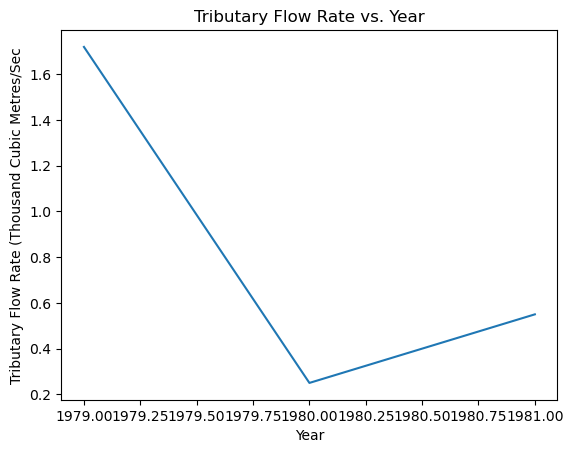

In [41]:
# Calling our main function so that we can see what it shows
main('fish.csv')